In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("../proc_data/ethylene_methane.csv")
df.head(5)

,Time,Conc_Meth,Conc_Eth,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,-0.33,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59


In [3]:
print(df.shape)

(4178504, 19)


In [4]:
feature_cols = df.columns.tolist()
feature_cols.remove("Conc_Meth")
feature_cols.remove("Conc_Eth")
feature_cols.remove("Time")

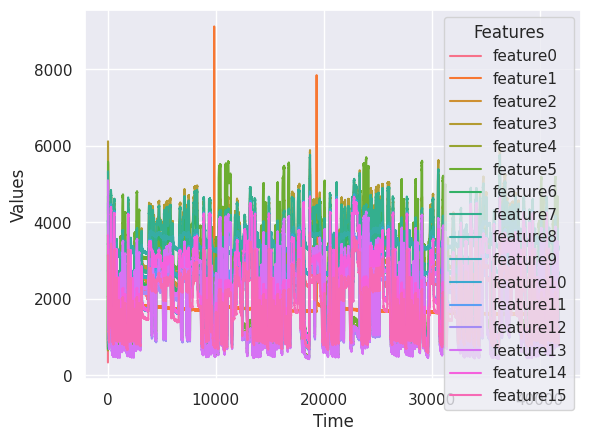

In [5]:
sample_df = df.sample(frac=0.01)
melted_df = pd.melt(sample_df[feature_cols + ['Time']], id_vars=['Time'], value_vars=feature_cols,
                     var_name='Features', value_name='Values')
sns.lineplot(x='Time', y='Values', hue='Features', data=melted_df)
plt.show()


### Normalisation

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

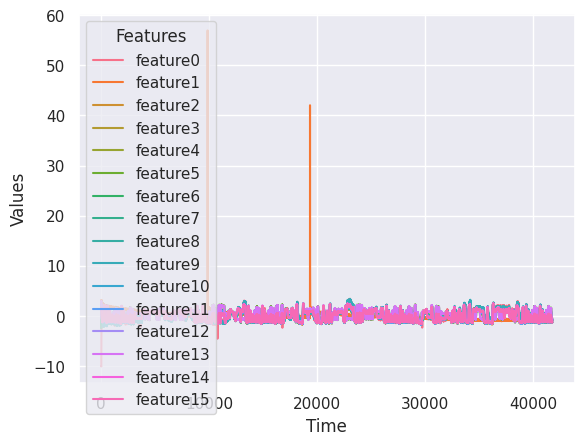

In [7]:
sample_df = df.sample(frac=0.01)
melted_df = pd.melt(sample_df[feature_cols + ['Time']], id_vars=['Time'], value_vars=feature_cols,
                     var_name='Features', value_name='Values')
sns.lineplot(x='Time', y='Values', hue='Features', data=melted_df)
plt.show()


[1.06496274e+01 3.77745333e+00 1.06671602e+00 4.14442777e-01
 4.04278897e-02 3.58340468e-02 8.19822133e-03 2.77949203e-03
 1.88873244e-03 1.02880225e-03 6.31978527e-04 3.77381862e-04
 2.72066420e-04 1.74987366e-04 8.65654577e-05 6.41025104e-05]
[6.65601555e+01 2.36090777e+01 6.66697354e+00 2.59026674e+00
 2.52674250e-01 2.23962739e-01 5.12388711e-02 1.73718211e-02
 1.18045749e-02 6.43001252e-03 3.94986485e-03 2.35863608e-03
 1.70041472e-03 1.09367078e-03 5.41033981e-04 4.00640594e-04]


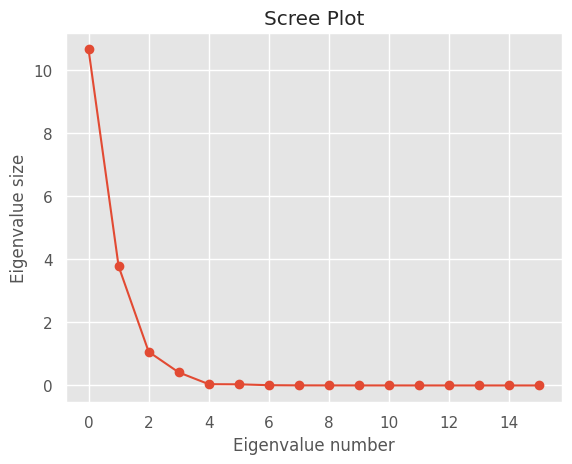

In [12]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=16)
pca.fit(df[feature_cols])
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")
print(pca.explained_variance_)
print(100*pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_))

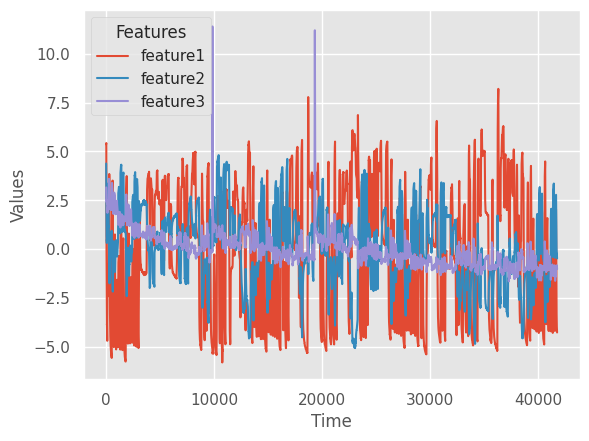

In [9]:
pca = PCA(n_components=3)
pca.fit(df[feature_cols])
new_feature_cols = ['feature1','feature2','feature3']
proc_df = pd.DataFrame(data=pca.transform(df[feature_cols]),columns=new_feature_cols)
proc_df['Time'] = df['Time']
proc_df['Conc_Meth'] = df['Conc_Meth']
proc_df['Conc_Eth'] = df['Conc_Eth']
sample_df = proc_df.sample(frac=0.001)
melted_df = pd.melt(sample_df[new_feature_cols + ['Time']], id_vars=['Time'], value_vars=new_feature_cols,
                     var_name='Features', value_name='Values')
sns.lineplot(x='Time', y='Values', hue='Features', data=melted_df)
plt.show()

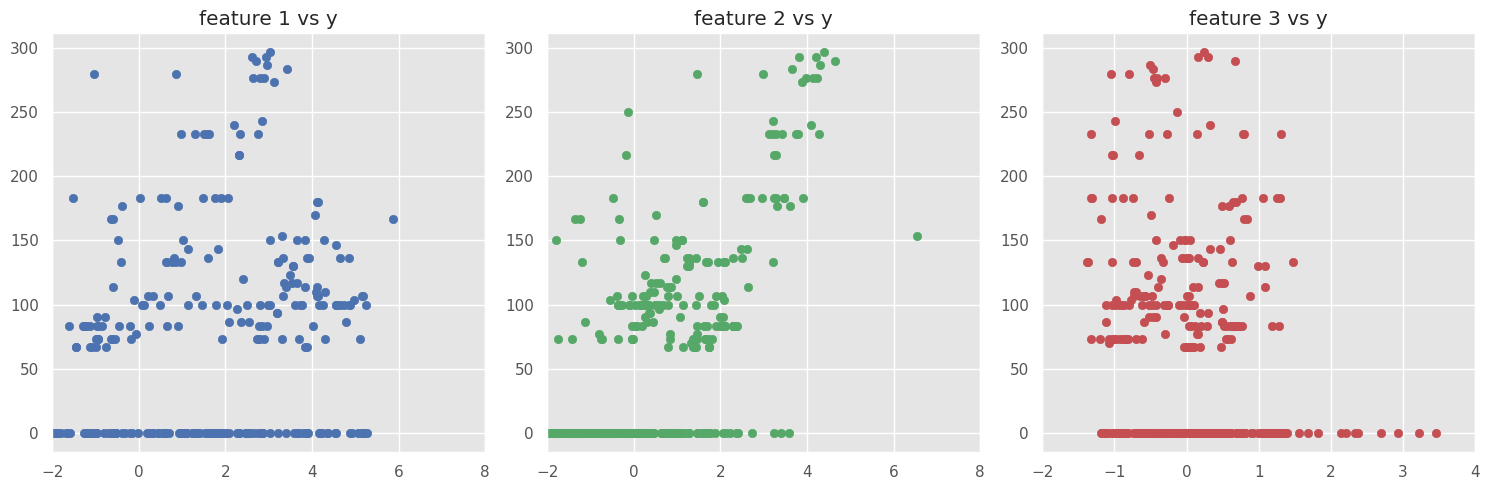

In [10]:
df_sample = proc_df.sample(frac=0.0001)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df_sample['feature1'], df_sample['Conc_Meth'], color='b')
axes[0].set_xlim([-2, 8]) 
axes[0].set_title('feature 1 vs y')

axes[1].scatter(df_sample['feature2'], df_sample['Conc_Meth'], color='g')
axes[1].set_xlim([-2, 8]) 
axes[1].set_title('feature 2 vs y')

axes[2].scatter(df_sample['feature3'], df_sample['Conc_Meth'], color='r')
axes[2].set_xlim([-2, 4]) 
axes[2].set_title('feature 3 vs y')

plt.tight_layout()

plt.show()

In [11]:
proc_df.to_csv("../proc_data/ethylene_methane_reduced.csv")